# Diabetes Cases prediction

Loading overview

In [40]:
import pandas as pd
import seaborn as sns
diabetes= pd.read_csv("diabetes.csv")
print (diabetes.shape)
print ("--"*30)
print (diabetes.info())

(768, 9)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [41]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# count the number of 0s in the column
num_zeros_glucose = (diabetes['Glucose'] == 0).sum()
num_zeros_bloodpressure = (diabetes['BloodPressure'] == 0).sum()
num_zeros_skinthickness = (diabetes['SkinThickness'] == 0).sum()
num_zeros_insulin = (diabetes['Insulin'] == 0).sum()
num_zeros_bmi = (diabetes['BMI'] == 0).sum()

# Print the number of zeros in each column
print("Number of zeros in Glucose column:", num_zeros_glucose)
print("Number of zeros in BloodPressure column:", num_zeros_bloodpressure)
print("Number of zeros in SkinThickness column:", num_zeros_skinthickness)
print("Number of zeros in Insulin column:", num_zeros_insulin)
print("Number of zeros in BMI column:", num_zeros_bmi)

Number of zeros in Glucose column: 5
Number of zeros in BloodPressure column: 35
Number of zeros in SkinThickness column: 227
Number of zeros in Insulin column: 374
Number of zeros in BMI column: 11


In [43]:
outcome_counts = diabetes['Outcome'].value_counts()

print("Non Diabetes:", outcome_counts[0])
print("Diabetes:", outcome_counts[1])

Non Diabetes: 500
Diabetes: 268


Implementing RF algorithm on unclean data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


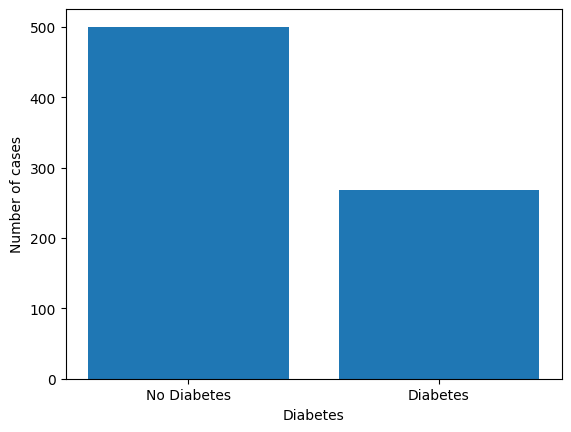

n_estimators: 1
Accuracy: 0.6753246753246753
F1 score: 0.5614035087719298
Runtime: 0.007004976272583008

n_estimators: 2
Accuracy: 0.6493506493506493
F1 score: 0.325
Runtime: 0.010203123092651367

n_estimators: 4
Accuracy: 0.7337662337662337
F1 score: 0.5591397849462365
Runtime: 0.012995719909667969

n_estimators: 8
Accuracy: 0.7337662337662337
F1 score: 0.6095238095238096
Runtime: 0.018942594528198242

n_estimators: 10
Accuracy: 0.7662337662337663
F1 score: 0.6785714285714286
Runtime: 0.020944595336914062

n_estimators: 12
Accuracy: 0.7532467532467533
F1 score: 0.6666666666666665
Runtime: 0.02546858787536621

n_estimators: 14
Accuracy: 0.7532467532467533
F1 score: 0.6545454545454545
Runtime: 0.028918027877807617

n_estimators: 16
Accuracy: 0.7402597402597403
F1 score: 0.6363636363636364
Runtime: 0.03267168998718262

n_estimators: 32
Accuracy: 0.7142857142857143
F1 score: 0.6
Runtime: 0.06443428993225098

n_estimators: 64
Accuracy: 0.7272727272727273
F1 score: 0.6181818181818182
Runtim

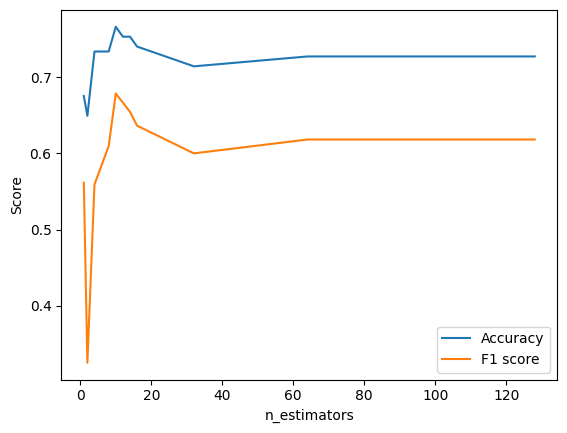

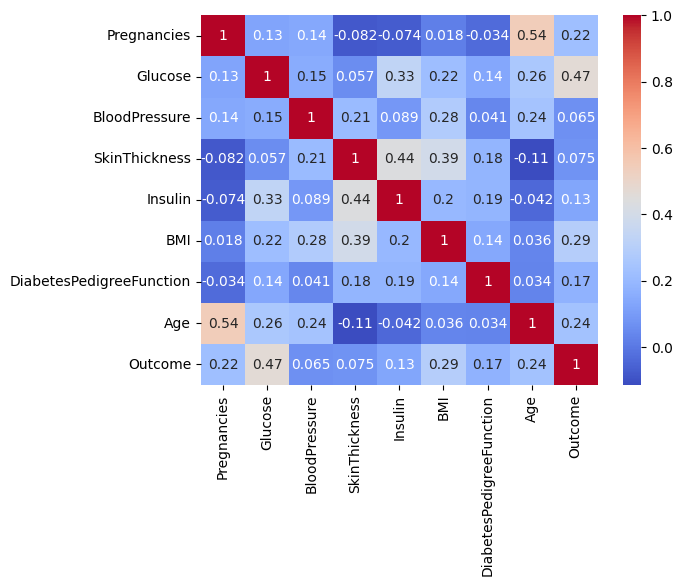

In [44]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes dataset
print(diabetes.head())

diabetes_counts = diabetes['Outcome'].value_counts()
print(diabetes_counts)

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Deleting some rows in data with 0 value and implementing RF algorithm again

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       44             62              0        0  25.0   
1            0       57             60              0        0  21.7   
2            9       57             80             37        0  32.8   
3            3       61             82             28        0  34.4   
4            7       62             78              0        0  32.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.587   36        0  
1                     0.735   67        0  
2                     0.096   41        0  
3                     0.243   46        0  
4                     0.391   41        0  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      21.443370   84.494475   
std       3.362803   30.750030      12.379870      15.732756  117.016513   

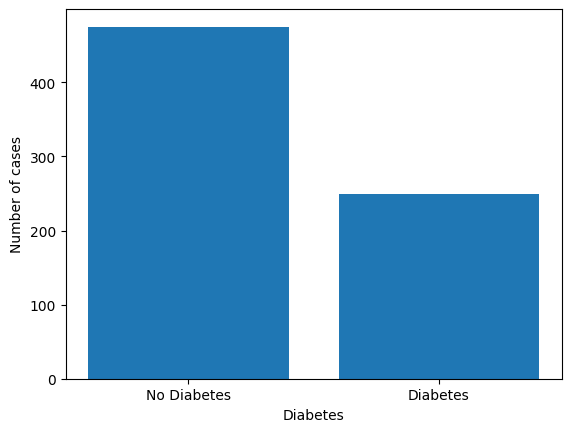

n_estimators: 1
Accuracy: 0.696551724137931
F1 score: 0.47619047619047616
Runtime: 0.007978200912475586

n_estimators: 2
Accuracy: 0.7379310344827587
F1 score: 0.44117647058823534
Runtime: 0.010008811950683594

n_estimators: 4
Accuracy: 0.7655172413793103
F1 score: 0.5
Runtime: 0.012089967727661133

n_estimators: 8
Accuracy: 0.7379310344827587
F1 score: 0.47222222222222215
Runtime: 0.018916845321655273

n_estimators: 10
Accuracy: 0.7448275862068966
F1 score: 0.4477611940298507
Runtime: 0.021966934204101562

n_estimators: 12
Accuracy: 0.7448275862068966
F1 score: 0.4931506849315069
Runtime: 0.023935317993164062

n_estimators: 14
Accuracy: 0.7517241379310344
F1 score: 0.5135135135135135
Runtime: 0.027927637100219727

n_estimators: 16
Accuracy: 0.7310344827586207
F1 score: 0.4507042253521127
Runtime: 0.034738779067993164

n_estimators: 32
Accuracy: 0.7379310344827587
F1 score: 0.4864864864864865
Runtime: 0.06151080131530762

n_estimators: 64
Accuracy: 0.7448275862068966
F1 score: 0.493150

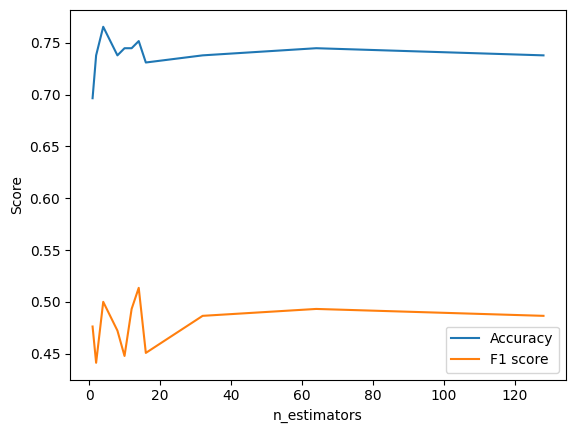

In [45]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes dataset
df = pd.read_csv('diabetes_clean.csv')

print(df.head())
print(df.describe())
diabetes_counts = df['Outcome'].value_counts()

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()

This time instead of deleting rows with some 0 values we replace all those values with the median

In [46]:
diabetes.loc[diabetes['Glucose'] == 0, 'Glucose'] = diabetes['Glucose'].median()
diabetes.loc[diabetes['BloodPressure'] == 0, 'BloodPressure'] = diabetes['BloodPressure'].median()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = diabetes['Insulin'].median()
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = diabetes['BMI'].median()
diabetes.loc[diabetes['SkinThickness'] == 0, 'SkinThickness'] = diabetes['SkinThickness'].median()
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


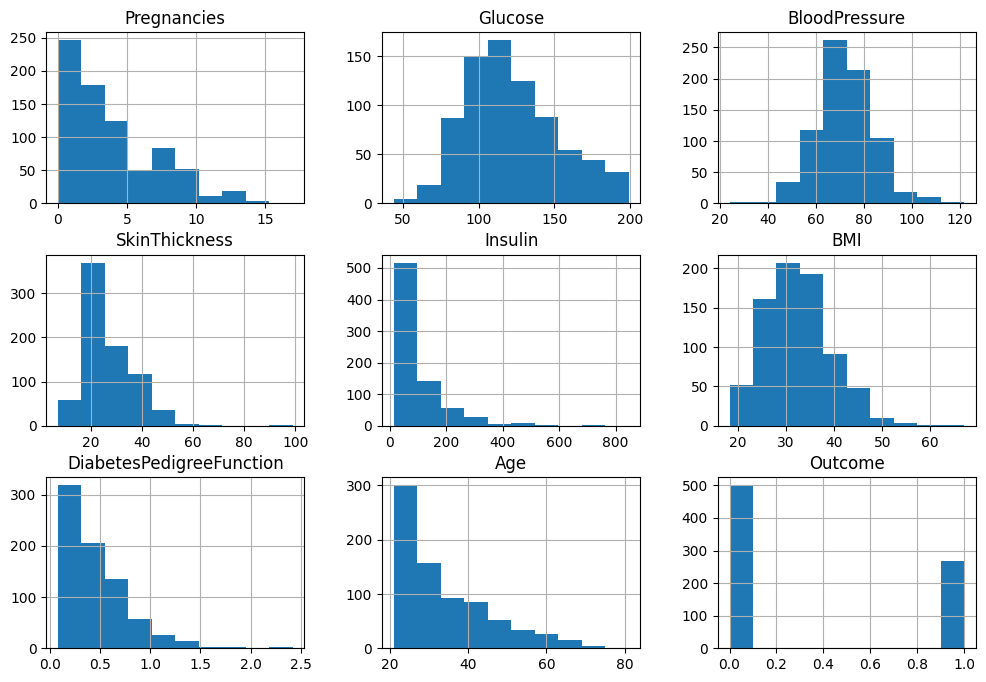

In [47]:
diabetes.hist(figsize = (12,8))
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


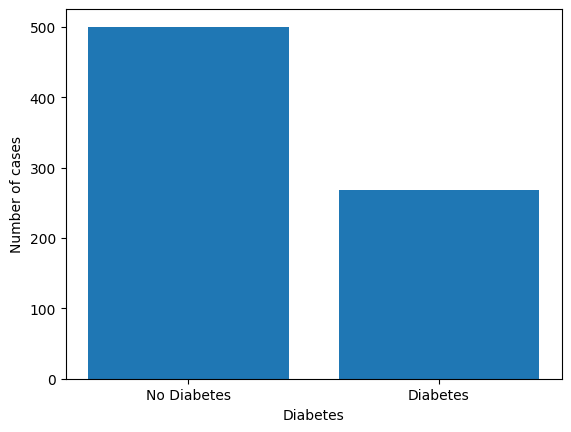

n_estimators: 1
Accuracy: 0.6883116883116883
F1 score: 0.5932203389830508
Recall score: 0.6363636363636364
Precision score: 0.5555555555555556
Runtime: 0.010970830917358398

n_estimators: 2
Accuracy: 0.7077922077922078
F1 score: 0.5161290322580645
Recall score: 0.43636363636363634
Precision score: 0.631578947368421
Runtime: 0.010576486587524414

n_estimators: 4
Accuracy: 0.7402597402597403
F1 score: 0.5744680851063829
Recall score: 0.4909090909090909
Precision score: 0.6923076923076923
Runtime: 0.014958381652832031

n_estimators: 8
Accuracy: 0.7532467532467533
F1 score: 0.6199999999999999
Recall score: 0.5636363636363636
Precision score: 0.6888888888888889
Runtime: 0.020943880081176758

n_estimators: 10
Accuracy: 0.7532467532467533
F1 score: 0.6122448979591837
Recall score: 0.5454545454545454
Precision score: 0.6976744186046512
Runtime: 0.024933815002441406

n_estimators: 12
Accuracy: 0.7662337662337663
F1 score: 0.6538461538461539
Recall score: 0.6181818181818182
Precision score: 0.69

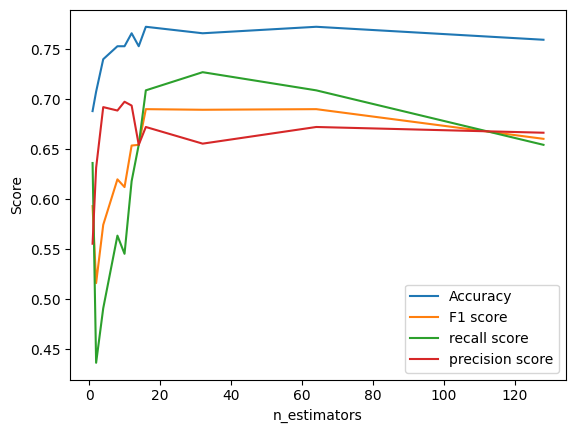

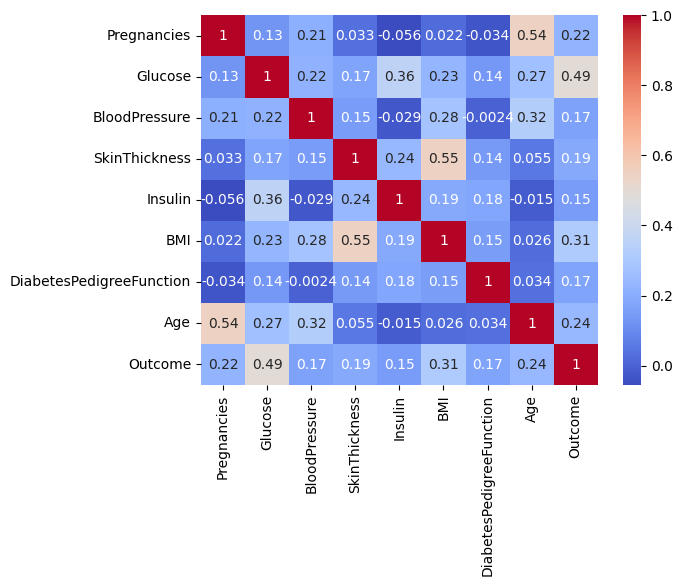

In [48]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Load the diabetes dataset
print(diabetes.head())


diabetes_counts = diabetes['Outcome'].value_counts()
print(diabetes_counts)

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Precision score:', precision)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.plot(n_estimators_range, recall_scores, label='recall score')
plt.plot(n_estimators_range, precision_scores, label='precision score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

linear: accuracy: 0.760, F1_score: 0.654,
poly: accuracy: 0.747, F1_score: 0.598,
rbf: accuracy: 0.766, F1_score: 0.633,
sigmoid: accuracy: 0.448, F1_score: 0.045,


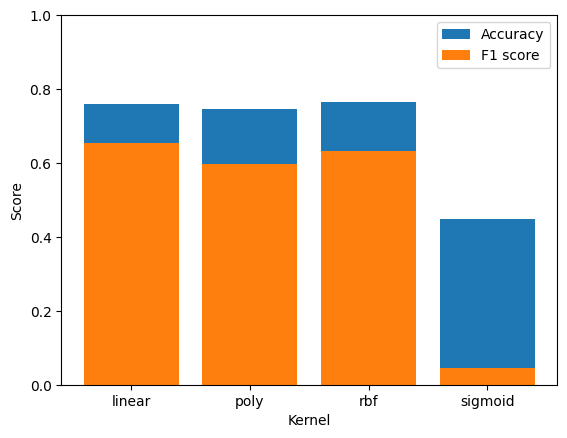

In [49]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scores = []
f1_scores = []
recall_scores = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    print("{}: accuracy: {:.3f}, F1_score: {:.3f},".format(kernel, accuracy, f1))

# Plot the results
plt.bar(kernels, accuracy_scores, label='Accuracy')
plt.bar(kernels, f1_scores, label='F1 score')
plt.ylim([0,1])
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.legend()
plt.show()




linear: accuracy: 0.701, F1_score: 0.623,
poly: accuracy: 0.727, F1_score: 0.625,
rbf: accuracy: 0.688, F1_score: 0.600,
sigmoid: accuracy: 0.305, F1_score: 0.219,


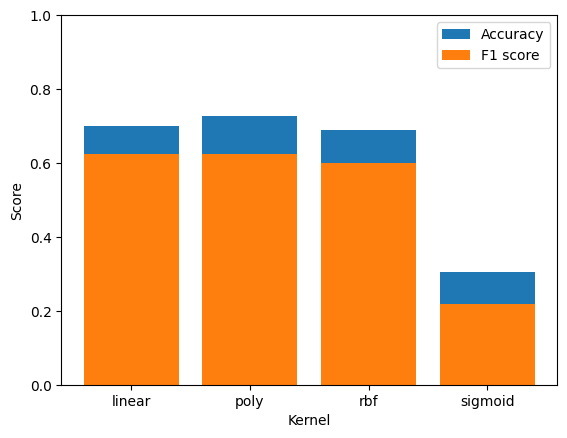

In [50]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scores = []
f1_scores = []
recall_scores = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_resampled, y_train_resampled)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    print("{}: accuracy: {:.3f}, F1_score: {:.3f},".format(kernel, accuracy, f1))

# Plot the results
plt.bar(kernels, accuracy_scores, label='Accuracy')
plt.bar(kernels, f1_scores, label='F1 score')
plt.ylim([0,1])
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.legend()
plt.show()


n_neighbors: 1
Accuracy: 0.6493506493506493
F1 score: 0.5573770491803278
Runtime: 0.010973215103149414

n_neighbors: 2
Accuracy: 0.6883116883116883
F1 score: 0.4666666666666667
Runtime: 0.015228986740112305

n_neighbors: 3
Accuracy: 0.6558441558441559
F1 score: 0.5691056910569107
Runtime: 0.00894927978515625

n_neighbors: 4
Accuracy: 0.6948051948051948
F1 score: 0.5523809523809523
Runtime: 0.00900721549987793

n_neighbors: 5
Accuracy: 0.6558441558441559
F1 score: 0.5619834710743802
Runtime: 0.007979869842529297

n_neighbors: 6
Accuracy: 0.6948051948051948
F1 score: 0.5607476635514018
Runtime: 0.00897526741027832

n_neighbors: 7
Accuracy: 0.6688311688311688
F1 score: 0.5714285714285714
Runtime: 0.00797128677368164

n_neighbors: 8
Accuracy: 0.7142857142857143
F1 score: 0.6
Runtime: 0.00797891616821289

n_neighbors: 9
Accuracy: 0.7142857142857143
F1 score: 0.6271186440677966
Runtime: 0.007978200912475586

n_neighbors: 10
Accuracy: 0.7532467532467533
F1 score: 0.6346153846153846
Runtime: 0

n_neighbors: 95
Accuracy: 0.7467532467532467
F1 score: 0.5806451612903225
Runtime: 0.013612031936645508

n_neighbors: 96
Accuracy: 0.7402597402597403
F1 score: 0.5454545454545455
Runtime: 0.01000666618347168

n_neighbors: 97
Accuracy: 0.7467532467532467
F1 score: 0.5617977528089887
Runtime: 0.010962247848510742

n_neighbors: 98
Accuracy: 0.7142857142857143
F1 score: 0.47619047619047616
Runtime: 0.009979248046875

n_neighbors: 99
Accuracy: 0.7012987012987013
F1 score: 0.4651162790697675
Runtime: 0.009968757629394531



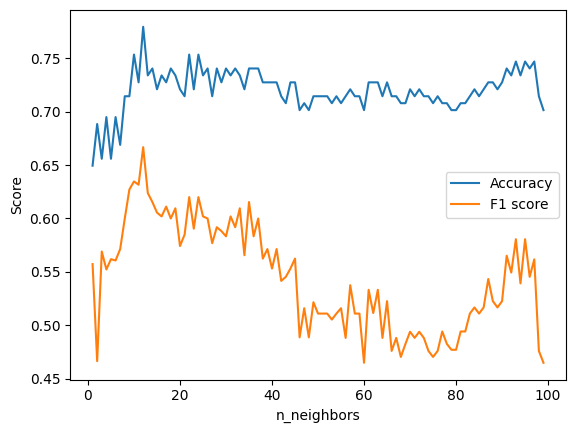

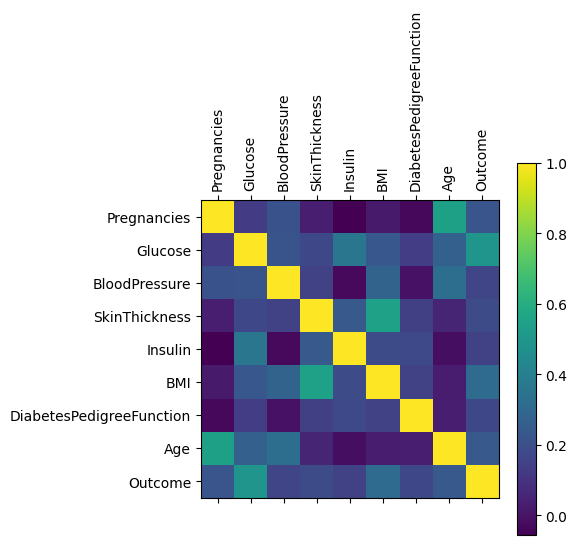

In [51]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Specify a range of n_neighbors values to evaluate
n_neighbors_range = range(1, 100)

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Evaluate the model for each value of n_neighbors
for n_neighbors in n_neighbors_range:
    start_time = time.time()
    
    
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_neighbors:', n_neighbors)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_neighbors_range, accuracy_scores, label='Accuracy')
plt.plot(n_neighbors_range, f1_scores, label='F1 score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


In [52]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Initialize a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results and runtime
print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Runtime:', end_time - start_time)



Accuracy: 0.7532467532467533
F1 score: 0.6666666666666665
Runtime: 0.0019948482513427734


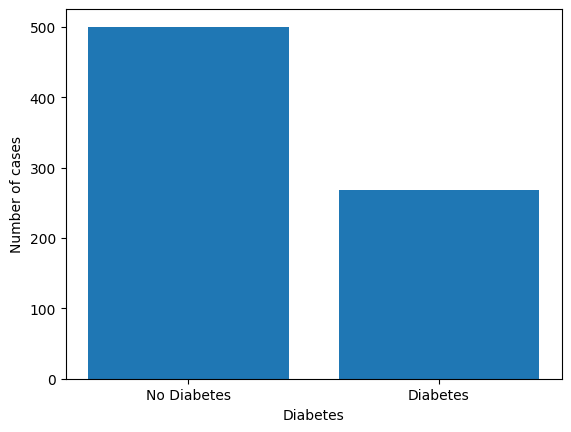

In [53]:
# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


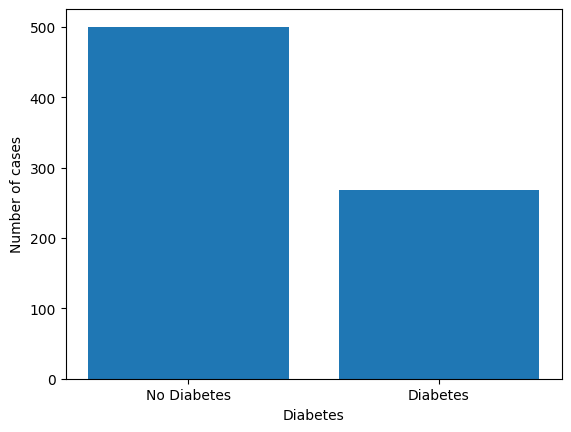

n_estimators: 1
Accuracy: 0.6428571428571429
F1 score: 0.0
Recall score: 0.0
Runtime: 0.008975028991699219

n_estimators: 2
Accuracy: 0.6428571428571429
F1 score: 0.0
Recall score: 0.0
Runtime: 0.010847806930541992

n_estimators: 4
Accuracy: 0.7077922077922078
F1 score: 0.34782608695652173
Recall score: 0.21818181818181817
Runtime: 0.012964725494384766

n_estimators: 8
Accuracy: 0.7792207792207793
F1 score: 0.6222222222222221
Recall score: 0.509090909090909
Runtime: 0.01695418357849121

n_estimators: 10
Accuracy: 0.7792207792207793
F1 score: 0.6382978723404256
Recall score: 0.5454545454545454
Runtime: 0.02094411849975586

n_estimators: 12
Accuracy: 0.7792207792207793
F1 score: 0.6382978723404256
Recall score: 0.5454545454545454
Runtime: 0.02293872833251953

n_estimators: 14
Accuracy: 0.7662337662337663
F1 score: 0.6326530612244898
Recall score: 0.5636363636363636
Runtime: 0.026482820510864258

n_estimators: 16
Accuracy: 0.7597402597402597
F1 score: 0.6336633663366337
Recall score: 0.58

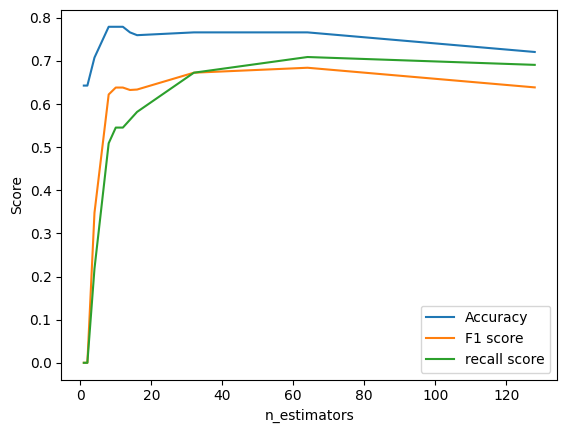

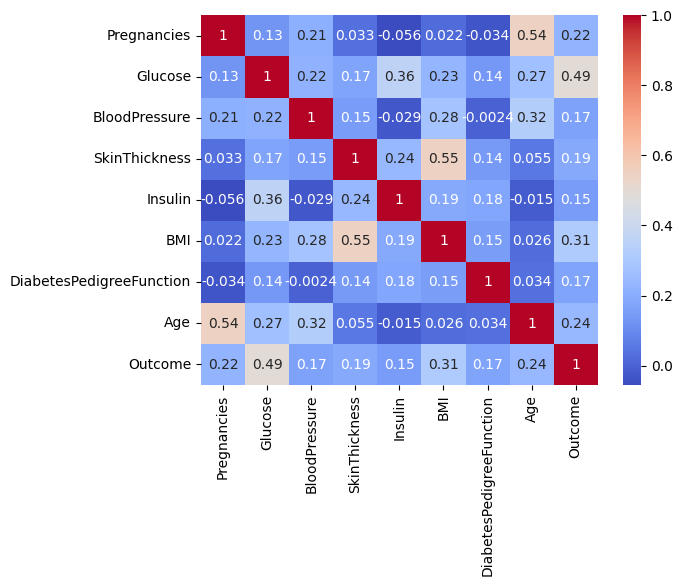

In [55]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Load the diabetes dataset
print(diabetes.head())

diabetes_counts = diabetes['Outcome'].value_counts()
print(diabetes_counts)

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []
recall_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a Gradient Boosting classifier
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gbc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gbc.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.plot(n_estimators_range, recall_scores, label='recall score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


n_neighbors: 1
Accuracy: 0.785
F1 score: 0.7962085308056872
Runtime: 0.010972261428833008

n_neighbors: 2
Accuracy: 0.805
F1 score: 0.7914438502673797
Runtime: 0.012964725494384766

n_neighbors: 3
Accuracy: 0.79
F1 score: 0.8037383177570093
Runtime: 0.015955686569213867

n_neighbors: 4
Accuracy: 0.765
F1 score: 0.7684729064039408
Runtime: 0.011633872985839844

n_neighbors: 5
Accuracy: 0.76
F1 score: 0.7735849056603774
Runtime: 0.010004997253417969

n_neighbors: 6
Accuracy: 0.725
F1 score: 0.7208121827411168
Runtime: 0.010971307754516602

n_neighbors: 7
Accuracy: 0.73
F1 score: 0.7403846153846154
Runtime: 0.008968591690063477

n_neighbors: 8
Accuracy: 0.7
F1 score: 0.7000000000000001
Runtime: 0.011943578720092773

n_neighbors: 9
Accuracy: 0.7
F1 score: 0.7222222222222222
Runtime: 0.00997304916381836

n_neighbors: 10
Accuracy: 0.715
F1 score: 0.7192118226600985
Runtime: 0.010970830917358398

n_neighbors: 11
Accuracy: 0.71
F1 score: 0.7264150943396227
Runtime: 0.009973287582397461

n_neig

n_neighbors: 95
Accuracy: 0.715
F1 score: 0.7443946188340808
Runtime: 0.013961076736450195

n_neighbors: 96
Accuracy: 0.715
F1 score: 0.7443946188340808
Runtime: 0.014963626861572266

n_neighbors: 97
Accuracy: 0.72
F1 score: 0.7500000000000001
Runtime: 0.014252901077270508

n_neighbors: 98
Accuracy: 0.715
F1 score: 0.7443946188340808
Runtime: 0.011967897415161133

n_neighbors: 99
Accuracy: 0.715
F1 score: 0.7443946188340808
Runtime: 0.01595902442932129



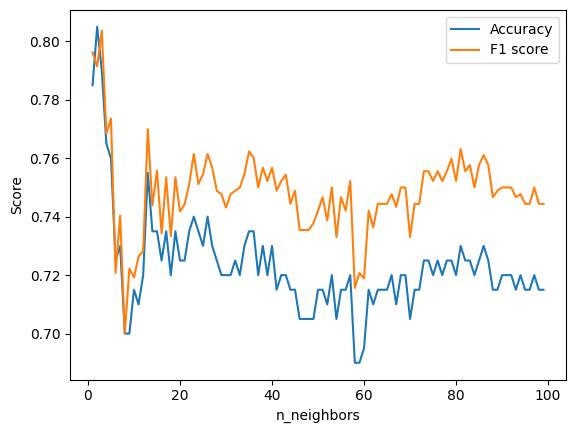

In [56]:
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Resample the data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Specify a range of n_neighbors values to evaluate
n_neighbors_range = range(1, 100)

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Evaluate the model for each value of n_neighbors
for n_neighbors in n_neighbors_range:
    start_time = time.time()
    
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_neighbors:', n_neighbors)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_neighbors_range, accuracy_scores, label='Accuracy')
plt.plot(n_neighbors_range, f1_scores, label='F1 score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()


